2025-04-08 14:27:28.738 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-04-08 14:27:30.113 
  command:

    streamlit run c:\Users\potat\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-04-08 14:27:30.119 No runtime found, using MemoryCacheStorageManager
2025-04-08 14:27:34.773 Session state does not function when running a script without `streamlit run`
C:\Users\potat\AppData\Local\Temp\ipykernel_25176\2079705731.py:56: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


DeltaGenerator()

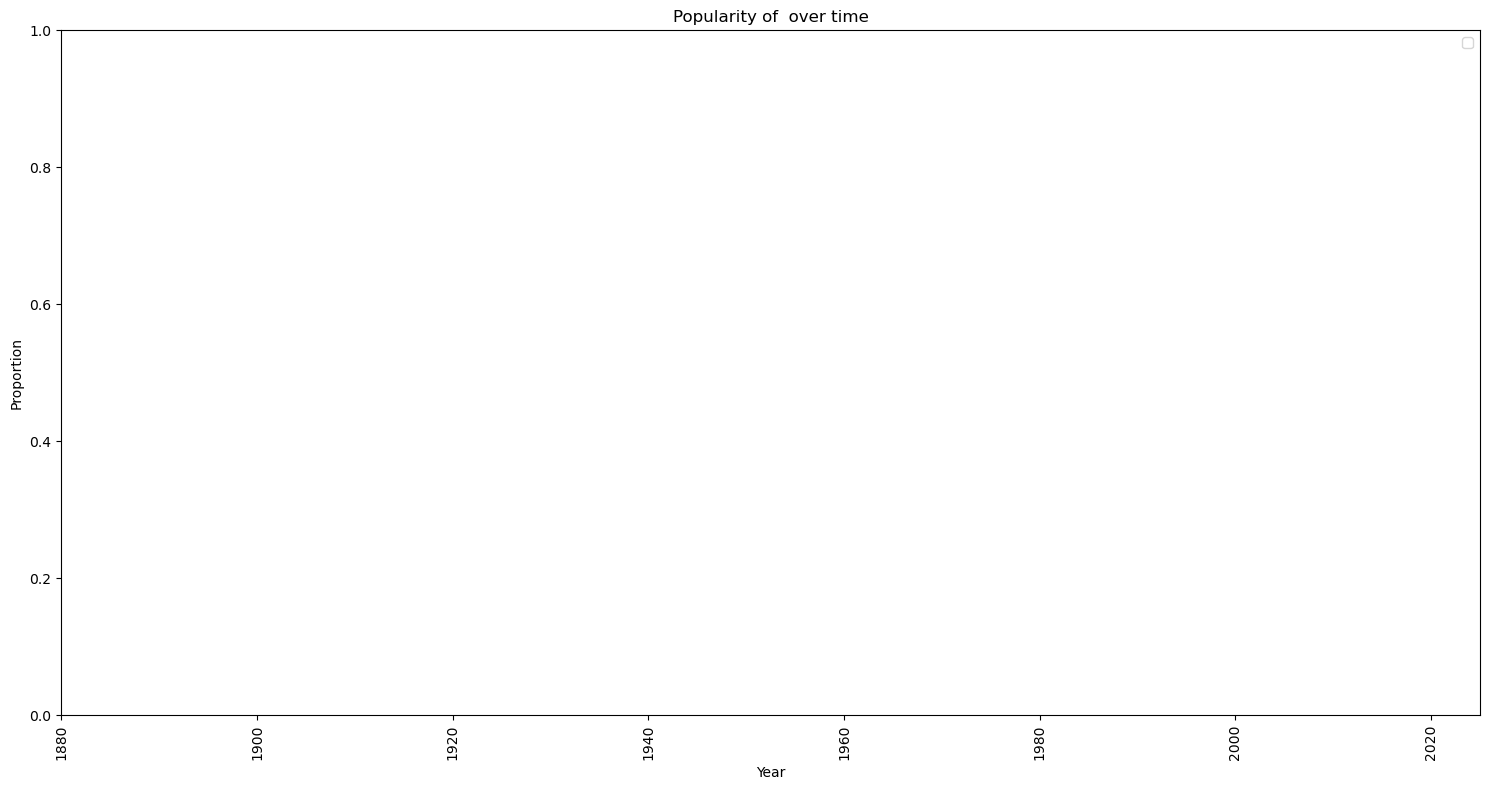

In [1]:
import pandas as pd
import zipfile
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import BytesIO
import streamlit as st

## LOAD DATA DIRECTLY FROM SS WEBSITE
@st.cache_data
def load_name_data():
    names_file = 'https://www.ssa.gov/oact/babynames/names.zip'
    response = requests.get(names_file)
    with zipfile.ZipFile(BytesIO(response.content)) as z:
        dfs = []
        files = [file for file in z.namelist() if file.endswith('.txt')]
        for file in files:
            with z.open(file) as f:
                df = pd.read_csv(f, header=None)
                df.columns = ['name','sex','count']
                df['year'] = int(file[3:7])
                dfs.append(df)
        data = pd.concat(dfs, ignore_index=True)
    data['pct'] = data['count'] / data.groupby(['year', 'sex'])['count'].transform('sum')
    return data

df = load_name_data()



df['total_births'] = df.groupby(['year', 'sex'])['count'].transform('sum')
df['prop'] = df['count'] / df['total_births']
st.title('My Name App')


# pick a name
noi = st.text_input('Enter a name')
plot_female = st.checkbox('Plot female line')
plot_male = st.checkbox('Plot male line')
name_df = df[df['name']==noi]

fig = plt.figure(figsize=(15, 8))

if plot_female:
    sns.lineplot(data=name_df[name_df['sex'] == 'F'], x='year', y='prop', label='Female')

if plot_male:
    sns.lineplot(data=name_df[name_df['sex'] == 'M'], x='year', y='prop', label='Male')

plt.title(f'Popularity of {noi} over time')
plt.xlim(1880, 2025)
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

st.pyplot(fig)